In [1]:
import numpy as np
import cv2
import matplotlib.pylab as plt
MINIMAP_SIZE = 280

s4map = plt.imread('Fortnite-map-season4-high-res.jpg', cv2.IMREAD_UNCHANGED)
test5x5 = plt.imread('test5x5.jpg', cv2.IMREAD_UNCHANGED)
test2x2 = plt.imread('testTile2x2.jpg', cv2.IMREAD_UNCHANGED)
testTile = plt.imread('test tile.jpg', cv2.IMREAD_UNCHANGED)
checked = np.zeros((s4map.shape[0], s4map.shape[1]))

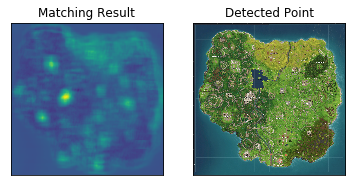

In [2]:
res = cv2.matchTemplate(s4map, testTile, cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc
bottom_right = (top_left[0] + MINIMAP_SIZE, top_left[1] + MINIMAP_SIZE)
cv2.rectangle(s4map,top_left, bottom_right, 255, 2)

plt.subplot(121),plt.imshow(res)
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(s4map)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.show()

In [3]:
print(min_loc)
actual_loc = (top_left[0] + MINIMAP_SIZE/2, top_left[1] + MINIMAP_SIZE/2)
print(top_left[0], top_left[1])
print(actual_loc)

(2043, 2077)
2043 2077
(2183.0, 2217.0)


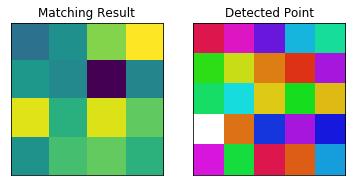

(2, 1)
(2, 1)


In [4]:
res = cv2.matchTemplate(test5x5,test2x2,cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc
bottom_right = (top_left[0] + 2, top_left[1] + 2)
#cv2.rectangle(test5x5,top_left, bottom_right, 255, 2)

plt.subplot(121),plt.imshow(res)
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(test5x5)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.show()
print(top_left)
print(min_loc)

In [6]:
import os

def video_to_frames(video, path_output_dir):
    # extract frames from a video and save to directory as 'x.png' where 
    # x is the frame index
    vidcap = cv2.VideoCapture(video)
    count = 0
    while vidcap.isOpened():
        success, image = vidcap.read()
        if success:
            cv2.imwrite(os.path.join(path_output_dir, '%d.png') % count, image)
            count += 1
        else:
            break
    cv2.destroyAllWindows()
    vidcap.release()
